## Repetition Experiment
In this notebook, we make the plots in Figure 4 (a)-(c) of Section 6.2

Experiment result is located here:

'./experiment_results/remote/execution_time/repetition/kaggle_home_credit/cloud-41/2019-10-20/09-36.csv'


In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
plt.rc('hatch', color='white', linewidth=1)
plt.use('pgf')

FONT_SIZE = 25
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,   
    "font.family": "serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": FONT_SIZE,     
    "font.size": FONT_SIZE,
    "legend.fontsize": FONT_SIZE, 
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    #"figure.figsize": figsize(1.0), 
     "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
})

warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results/remote'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/papers/images/experiment-results/'

output_directory = WRITE_DIRECTORY_ROOT + 'kaggle_home_credit/execution_time'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
WORKLOADS = {'start_here_a_gentle_introduction':'(a) Workload 1',
            'introduction_to_manual_feature_engineering':'(b) Workload 2',
            'introduction_to_manual_feature_engineering_p2': '(c) Workload 3'}

def savefig(filename):
    plt.savefig('{}.pgf'.format(filename), bbox_inches='tight')
    plt.savefig('{}.pdf'.format(filename), bbox_inches='tight')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lo

In [2]:
result_folder = ROOT_RESULT_FOLDER + '/execution_time/repetition/kaggle_home_credit'
FINAL_RESULT_FILE = result_folder + '/cloud-41/2019-10-20/09-36.csv'
result_file = result_folder + '/cloud-41/2020-02-05/22-43.csv'

In [3]:
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'workload','type', 'rep', 'mat_rate',
    'run_time'
]
method_map = {'optimized':'CO','baseline':'KG', 'helix':'HL'}
execution_times = pd.read_csv(result_file, header=None, names=HEADERS)
execution_times['type'] = execution_times['type'].replace(method_map)
execution_times['cumulative_run_time'] = execution_times.groupby(['exp_id','workload','type'])['run_time'].apply(lambda x: x.cumsum())

In [4]:
execution_times

,timestamp,exp_id,repo,workload,type,rep,mat_rate,run_time,cumulative_run_time
0,01:09:48,DB3CB845,kaggle_home_credit,introduction_to_manual_feature_engineering,KG,1,0.0,208.245746,208.245746
1,01:09:48,DB3CB845,kaggle_home_credit,introduction_to_manual_feature_engineering,KG,2,0.0,206.476753,414.722499
2,01:16:43,12BE949F,kaggle_home_credit,introduction_to_manual_feature_engineering,CO,1,16777216.0,174.685267,174.685267
3,01:16:43,12BE949F,kaggle_home_credit,introduction_to_manual_feature_engineering,CO,2,16777216.0,10.442684,185.127951
4,01:28:37,947FFBA1,kaggle_home_credit,introduction_to_manual_feature_engineering_p2,KG,1,0.0,369.909023,369.909023
5,01:28:37,947FFBA1,kaggle_home_credit,introduction_to_manual_feature_engineering_p2,KG,2,0.0,389.474996,759.384019
6,01:41:17,B708BAD9,kaggle_home_credit,introduction_to_manual_feature_engineering_p2,CO,1,16777216.0,293.026737,293.026737
7,01:41:17,B708BAD9,kaggle_home_credit,introduction_to_manual_feature_engineering_p2,CO,2,16777216.0,70.543435,363.570172
8,02:01:31,C930BD24,kaggle_home_credit,start_here_a_gentle_introduction,KG,1,0.0,194.661522,194.661522
9,02:01:31,C930BD24,kaggle_home_credit,start_here_a_gentle_introduction,KG,2,0.0,194.369958,389.031480


In [6]:
def plot_run_time(df, ax=None, workload_id=None):
    cat = sns.barplot(
        data=df,
        x='rep',
        y='run_time',
        ax=ax,
        hue='type',
       # kind='bar',
        errwidth=3,
        errcolor='0',
        ci='sd',
        hue_order=['CO', 'HL', 'KG'],
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR,
            'HL': sns.color_palette()[2]
        })
       #legend=False)
    top = df['run_time'].max()
#     cat.set_xlabel(WORKLOADS[workload_id],fontsize=AXIS_FONT + 6, labelpad=5)
    cat.set_xlabel('\\textbf{{{}}}'.format(WORKLOADS[workload_id]), labelpad=5)
#     cat.set_ylabel('Run Time (s)', fontsize=AXIS_FONT)
    cat.set_ylabel('Run Time (s)')
    #plt.tick_params(labelsize=TICK_LABEL_SIZE)
    if top < 250:
        cat.set_yticks(range(0, 201, 50))
        cat.set_ylim(0, 220)
    else:
        cat.set_yticks(range(0, 401, 100))
        cat.set_ylim(0, 420)
    cat.set_xticklabels(['Run 1', 'Run 2'])
    #cat.set_xticks([-.25,.75])
    num_executions = len(df.rep.unique())
    for i, bar in enumerate(cat.patches):
        if i < num_executions:
            h = '/'
        elif i < 2*num_executions:
            h = 'O'
        else:
            h = 'X'
        bar.set_edgecolor('black')
        bar.set_hatch(h)
        #new_value = 0.15
        #current_width = bar.get_width()
        #print current_width
       # diff = current_width - new_value
        #bar.set_width(new_value)
        # we recenter the bar
        #bar.set_x(bar.get_x() + diff * .5)
        #bar.set_width(.1)
    #ax.tick_params(labelsize=TICK_LABEL_SIZE)    
    ax.tick_params(axis='y', which='major', pad=-2)
    ax.tick_params(axis='x', which='major', pad=-2)
    cat.get_legend().remove()
        
    return cat

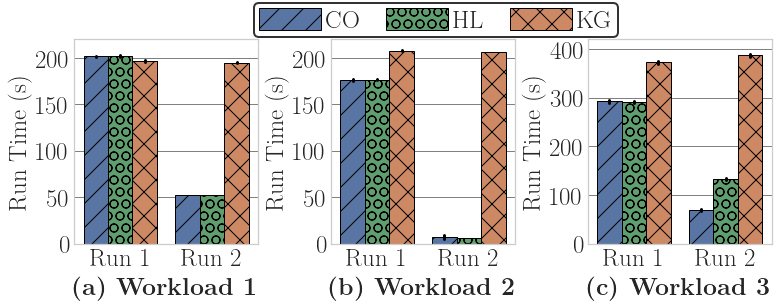

In [8]:
plt.clf()
fig = plt.figure(figsize=(11,4))
ax1 = fig.add_subplot(131)
df = execution_times[execution_times['workload'] == 'start_here_a_gentle_introduction']
p1=plot_run_time(df,ax1,workload_id='start_here_a_gentle_introduction')

ax2 = fig.add_subplot(132)
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering']
p2=plot_run_time(df, ax2,workload_id='introduction_to_manual_feature_engineering')

ax3 = fig.add_subplot(133)
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering_p2']
p3=plot_run_time(df, ax3,workload_id='introduction_to_manual_feature_engineering_p2')
plt.tight_layout()

path = output_directory+'/repeated_workloads'
create_folder(path=path)
lg = fig.legend(
    borderpad=0.2,
    frameon=True,
    loc='upper center',
    handlelength=2.5,
    handleheight=1,
    handletextpad=0.2,
    #fontsize=AXIS_FONT,
    ncol=3,
    columnspacing=1,
    bbox_to_anchor=(0.55, 1.1))

fig.tight_layout( w_pad=0, h_pad=1)
lg.get_frame().set_edgecolor('black')
lg.get_frame().set_linewidth(2.0)

savefig(path)

In [26]:
def plot_run_one_by_one_time(df, loc=None, has_legend=False):
    cat = sns.catplot(
        data=df,
        x='rep',
        y='run_time',
        hue='type',
        kind='bar',
        errwidth=3,
        errcolor='0',
        ci='sd',
        hue_order=['CO', 'KG', 'HL'],
        palette={
            'CO': SYSTEM_COLOR,
            'KG': BASELINE_COLOR,
            'HL': sns.color_palette()[2]
        },
        legend=False)
    top = df['run_time'].max()
    cat.set_xlabels('Run', fontsize=AXIS_FONT)
    cat.set_ylabels('Run Time (s)', fontsize=AXIS_FONT)
    ax = cat.axes[0][0]
    plt.tick_params(labelsize=TICK_LABEL_SIZE)
    if top < 250:
        ax.set_yticks(range(0, 201, 50))
    else:
        ax.set_yticks(range(0, 401, 100))
    num_executions = len(df.rep.unique())
    for i, bar in enumerate(cat.ax.patches):
        if i < num_executions:
            h = '/'
        elif i < 2*num_executions:
            h = 'X'
        else:
            h = 'O'
        bar.set_edgecolor('black')
        bar.set_hatch(h)
    if has_legend:
        lg = plt.legend(
            loc='upper center',
            handlelength=2,
            handletextpad=0.1,
            fontsize=TICK_LABEL_SIZE,
            ncol=3,
            columnspacing=0.2,
            bbox_to_anchor=(0.55, 1.2))
    if loc is not None:
        cat.savefig(loc, bbox_inches='tight')

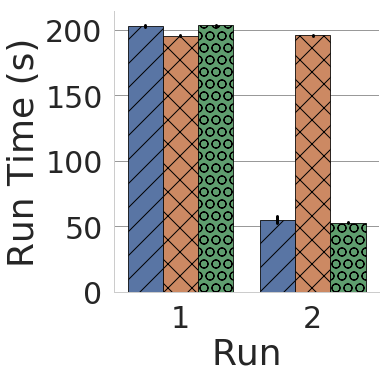

In [66]:
df = execution_times[execution_times['workload'] == 'start_here_a_gentle_introduction']
path = output_directory+'/start_here_a_gentle_introduction.pdf'
create_folder(path=path)
#plot_run_time(df, path)
plot_run_one_by_one_time(df, path)

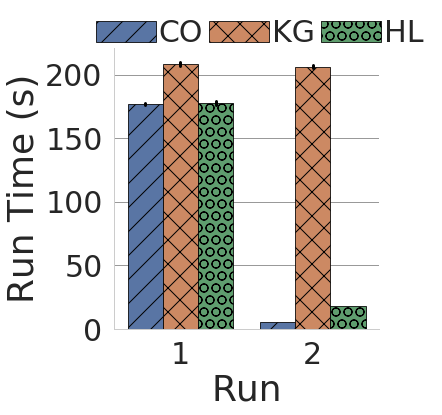

In [67]:
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering']
path = output_directory+'/introduction_to_manual_feature_engineering.pdf'
create_folder(path=path)
#plot_run_time(df, path)
plot_run_one_by_one_time(df, path, has_legend=True)

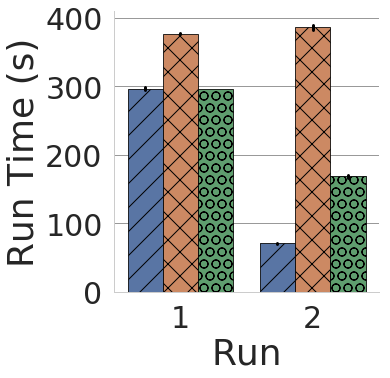

In [68]:
df = execution_times[execution_times['workload'] == 'introduction_to_manual_feature_engineering_p2']
path = output_directory+'/introduction_to_manual_feature_engineering_p2.pdf'
create_folder(path=path)
#plot_run_time(df, path)
plot_run_one_by_one_time(df,path)